In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
ds = pd.read_csv('organics_clean.csv', index_col=0)

In [3]:
ds.head()

,Gender,Geographic Region,Loyalty Status,Neigborhood Cluster-55 Level,Neighborhood Cluster-7 Level,Affluence Grade,Age,Loyalty Card Tenure,Organics Purchase Count,Organics Purchase Indicator,Total Spend
0,0,0,2,27.0,3,5,70,8,1,1,0.02
1,1,0,3,51.0,5,10,65,7,1,1,0.01
2,0,0,3,4.0,0,11,68,8,0,0,0.01
3,0,0,3,3.0,0,11,74,8,0,0,0.01
4,1,1,3,32.0,3,13,62,5,0,0,0.01


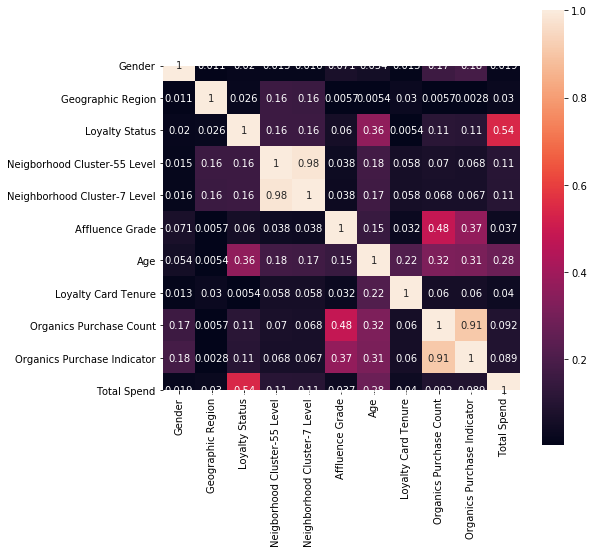

In [4]:
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(abs(ds.corr()), annot=True, square=True);

#### Conclusions from the correlation matrix:
- The 'Neigborhood Cluster-55 Level' and the 'Neighborhood Cluster-7 Level' are highly related, so as it's not clear what is the '55' about I'll drop it and keep only the '7'.
- As expected, the 'Organics Purchase Count' and the 'Organics Purchase Indicator' are highly related, I'll use them separately as targets for the models.
- The 'Total Spend' is mostly related to the 'Loyalty Status', I'll analyse that later.

In [5]:
ds.drop(columns='Neigborhood Cluster-55 Level', inplace=True)

In [6]:
ds.shape

(14895, 10)

In [7]:
ds.head()

,Gender,Geographic Region,Loyalty Status,Neighborhood Cluster-7 Level,Affluence Grade,Age,Loyalty Card Tenure,Organics Purchase Count,Organics Purchase Indicator,Total Spend
0,0,0,2,3,5,70,8,1,1,0.02
1,1,0,3,5,10,65,7,1,1,0.01
2,0,0,3,0,11,68,8,0,0,0.01
3,0,0,3,0,11,74,8,0,0,0.01
4,1,1,3,3,13,62,5,0,0,0.01


In [8]:
ds.to_csv('organics_stats.csv')